In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [1]:
#start and end date
trip_start = dt.date(2020,10,30)
trip_end = dt.date(2020,11,6)

# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

# Perform a query to retrieve the data and precipitation scores
year = dt.date(2017,8,23) - dt.timedelta(days=365)
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>year).\
order_by(Measurement.date).all()
precipitation[0]

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation)
precipitation_df

NameError: name 'dt' is not defined

In [14]:
# Sort the dataframe by date
precipitation_df.set_index('date')
precipitation_df = precipitation_df.sort_index(ascending=True)
precipitation_df


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


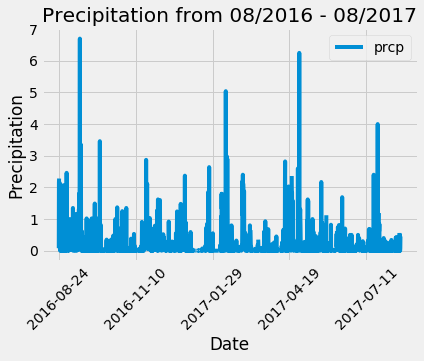

<Figure size 2880x2880 with 0 Axes>

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot('date','prcp')
plt.title('Precipitation from 08/2016 - 08/2017')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(rotation = 45)
plt.figure(figsize=(40,40))

plt.show()

In [21]:
plt.savefig("Images/precip.png")

<Figure size 432x288 with 0 Axes>

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# Design a query to show how many stations are available in this dataset?
Stations = session.query(Station).count()
Stations

9

In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = (session.query(Measurement.station, func.count(Measurement.station)).\
         group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())

most_act = active[0][0]

print("Station with the highest observations was " + most_act+" with "+str(active[0][1])+" observations")
print("List of stations and observation counts in desc order:")
for j, i in active:
    print("Station " + j + " had " + str(i) + " observations")


Station with the highest observations was USC00519281 with 2772 observations
List of stations and observation counts in desc order:
Station USC00519281 had 2772 observations
Station USC00519397 had 2724 observations
Station USC00513117 had 2709 observations
Station USC00519523 had 2669 observations
Station USC00516128 had 2612 observations
Station USC00514830 had 2202 observations
Station USC00511918 had 1979 observations
Station USC00517948 had 1372 observations
Station USC00518838 had 511 observations


In [41]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station, func.min(Measurement.tobs),
             func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").\
    group_by(Measurement.station).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station


high_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_act).\
    filter(Measurement.date>year).order_by(Measurement.date).all()
high_temp_df = pd.DataFrame(high_temp)
high_temp_df


,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0
...,...,...,...
346,USC00519281,2017-08-14,77.0
347,USC00519281,2017-08-15,77.0
348,USC00519281,2017-08-16,76.0
349,USC00519281,2017-08-17,76.0


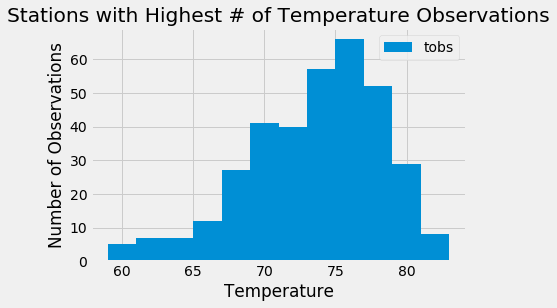

In [37]:
# plot the results as a histogram
high_temp_df.set_index('date')
high_temp_df.plot.hist(bins=12)
plt.title("Stations with Highest # of Temperature Observations")
plt.xlabel("Temperature")
plt.ylabel("Number of Observations")
plt.show()